In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.dpi'] = 450

In [2]:
root_dir = '/Volumes/Data2/RST/notebook/'
data_dir = '/Volumes/Data2/RST/notebook/networks/'

In [4]:
data_dir = 'D:\\RST\\notebook\\networks\\'
root_dir = 'D:\\RST\\notebook\\'

In [5]:
tts = pd.read_csv(root_dir + 'TTS OD/TTS_TYPE_no-acronym.csv')
tts = tts.rename(columns = {'origin':'o_node', 'destination':'d_node'})

In [6]:
tts_pivot = tts
tts_pivot = tts_pivot.groupby('type').agg({'total':'sum'}).reset_index()
tts_pivot['group'] = tts_pivot['type'].str.split('_', expand = True)[0]
tts_pivot['period'] = tts_pivot['type'].str.split('_', expand = True)[1]

In [7]:
tts_pivot['period'] = tts_pivot['period'].str.upper()

In [8]:
tts_pivot['period'] = pd.Categorical(tts_pivot['period'], ['EM', 'AM', 'MD', 'PM', 'EV'])

In [9]:
tts_pivot = tts_pivot.sort_values(by = 'period')

In [10]:
tts_pivot.head()

,type,total,group,period
31,Racialized_em,2702.362035,Racialized,EM
1,Black_em,577.180099,Black,EM
36,Recent Immigrants_em,362.056815,Recent Immigrants,EM
21,Low Income_em,2186.000000,Low Income,EM
16,Indigenous_em,8.001949,Indigenous,EM


In [11]:
pivot = np.round(tts_pivot.pivot('group', 'period', 'total').astype(int)).sort_values(by = 'AM', ascending = False)
pivot

period,EM,AM,MD,PM,EV
group,,,,,
General Population,4735,211847,62700,204353,44598
Racialized,2702,105997,30357,98770,21821
Carless Households,2317,62089,29944,71600,21377
Low Income,2186,59928,27395,51070,15890
Black,577,18536,5589,15952,3783
Recent Immigrants,362,15436,4381,14558,3177
No Offical Languages Proficiency,244,9683,2812,8969,1976
Indigenous,8,345,107,366,82


In [16]:
list(tts_pivot['group'].drop_duplicates())

['Racialized',
 'Black',
 'Recent Immigrants',
 'Low Income',
 'Indigenous',
 'Carless Households',
 'No Offical Languages Proficiency',
 'General Population']

Text(208.74999999999994, 0.5, 'Equity Seeking Group')

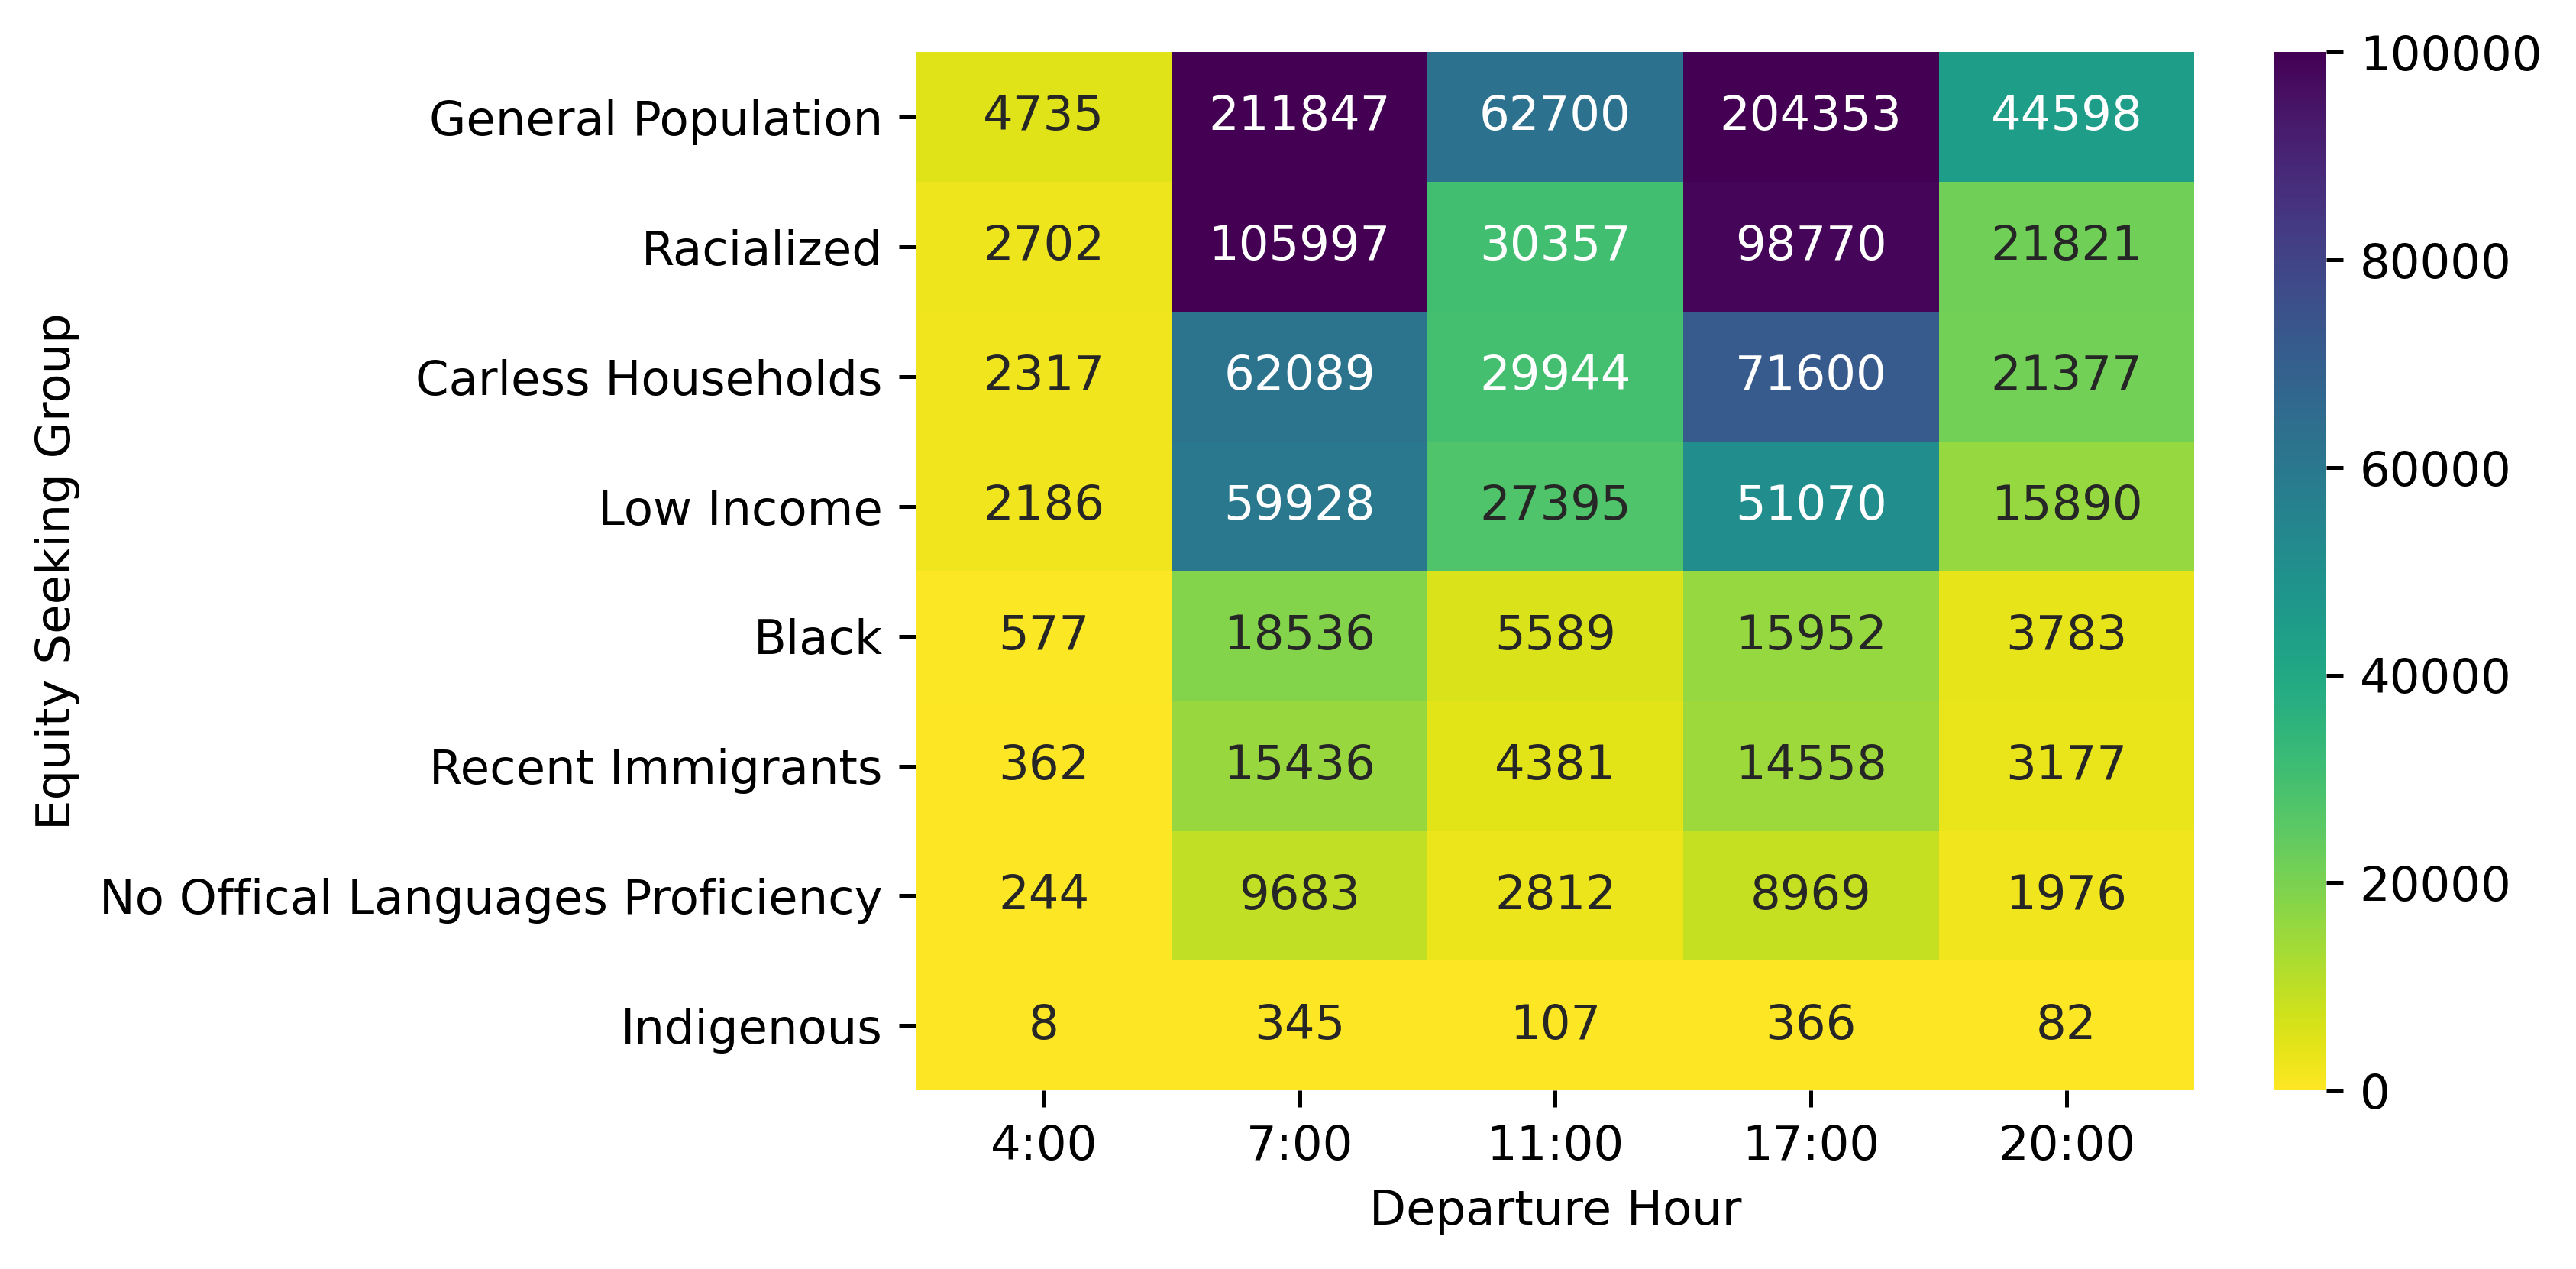

In [11]:
fig, ax = plt.subplots()

sns.heatmap(pivot, ax = ax, cmap = 'viridis_r', annot=True, fmt = 'g', vmin = 0, vmax = 100000)

ax.set_xticklabels(['4:00', '7:00', '11:00',
                    '17:00', '20:00'])


ax.set_xlabel('Departure Hour')
ax.set_ylabel('Equity Seeking Group')

In [11]:
start = [4,8,11,17,20]
end = [5,9,12,18,21]
length = [9,13,16,22,23]

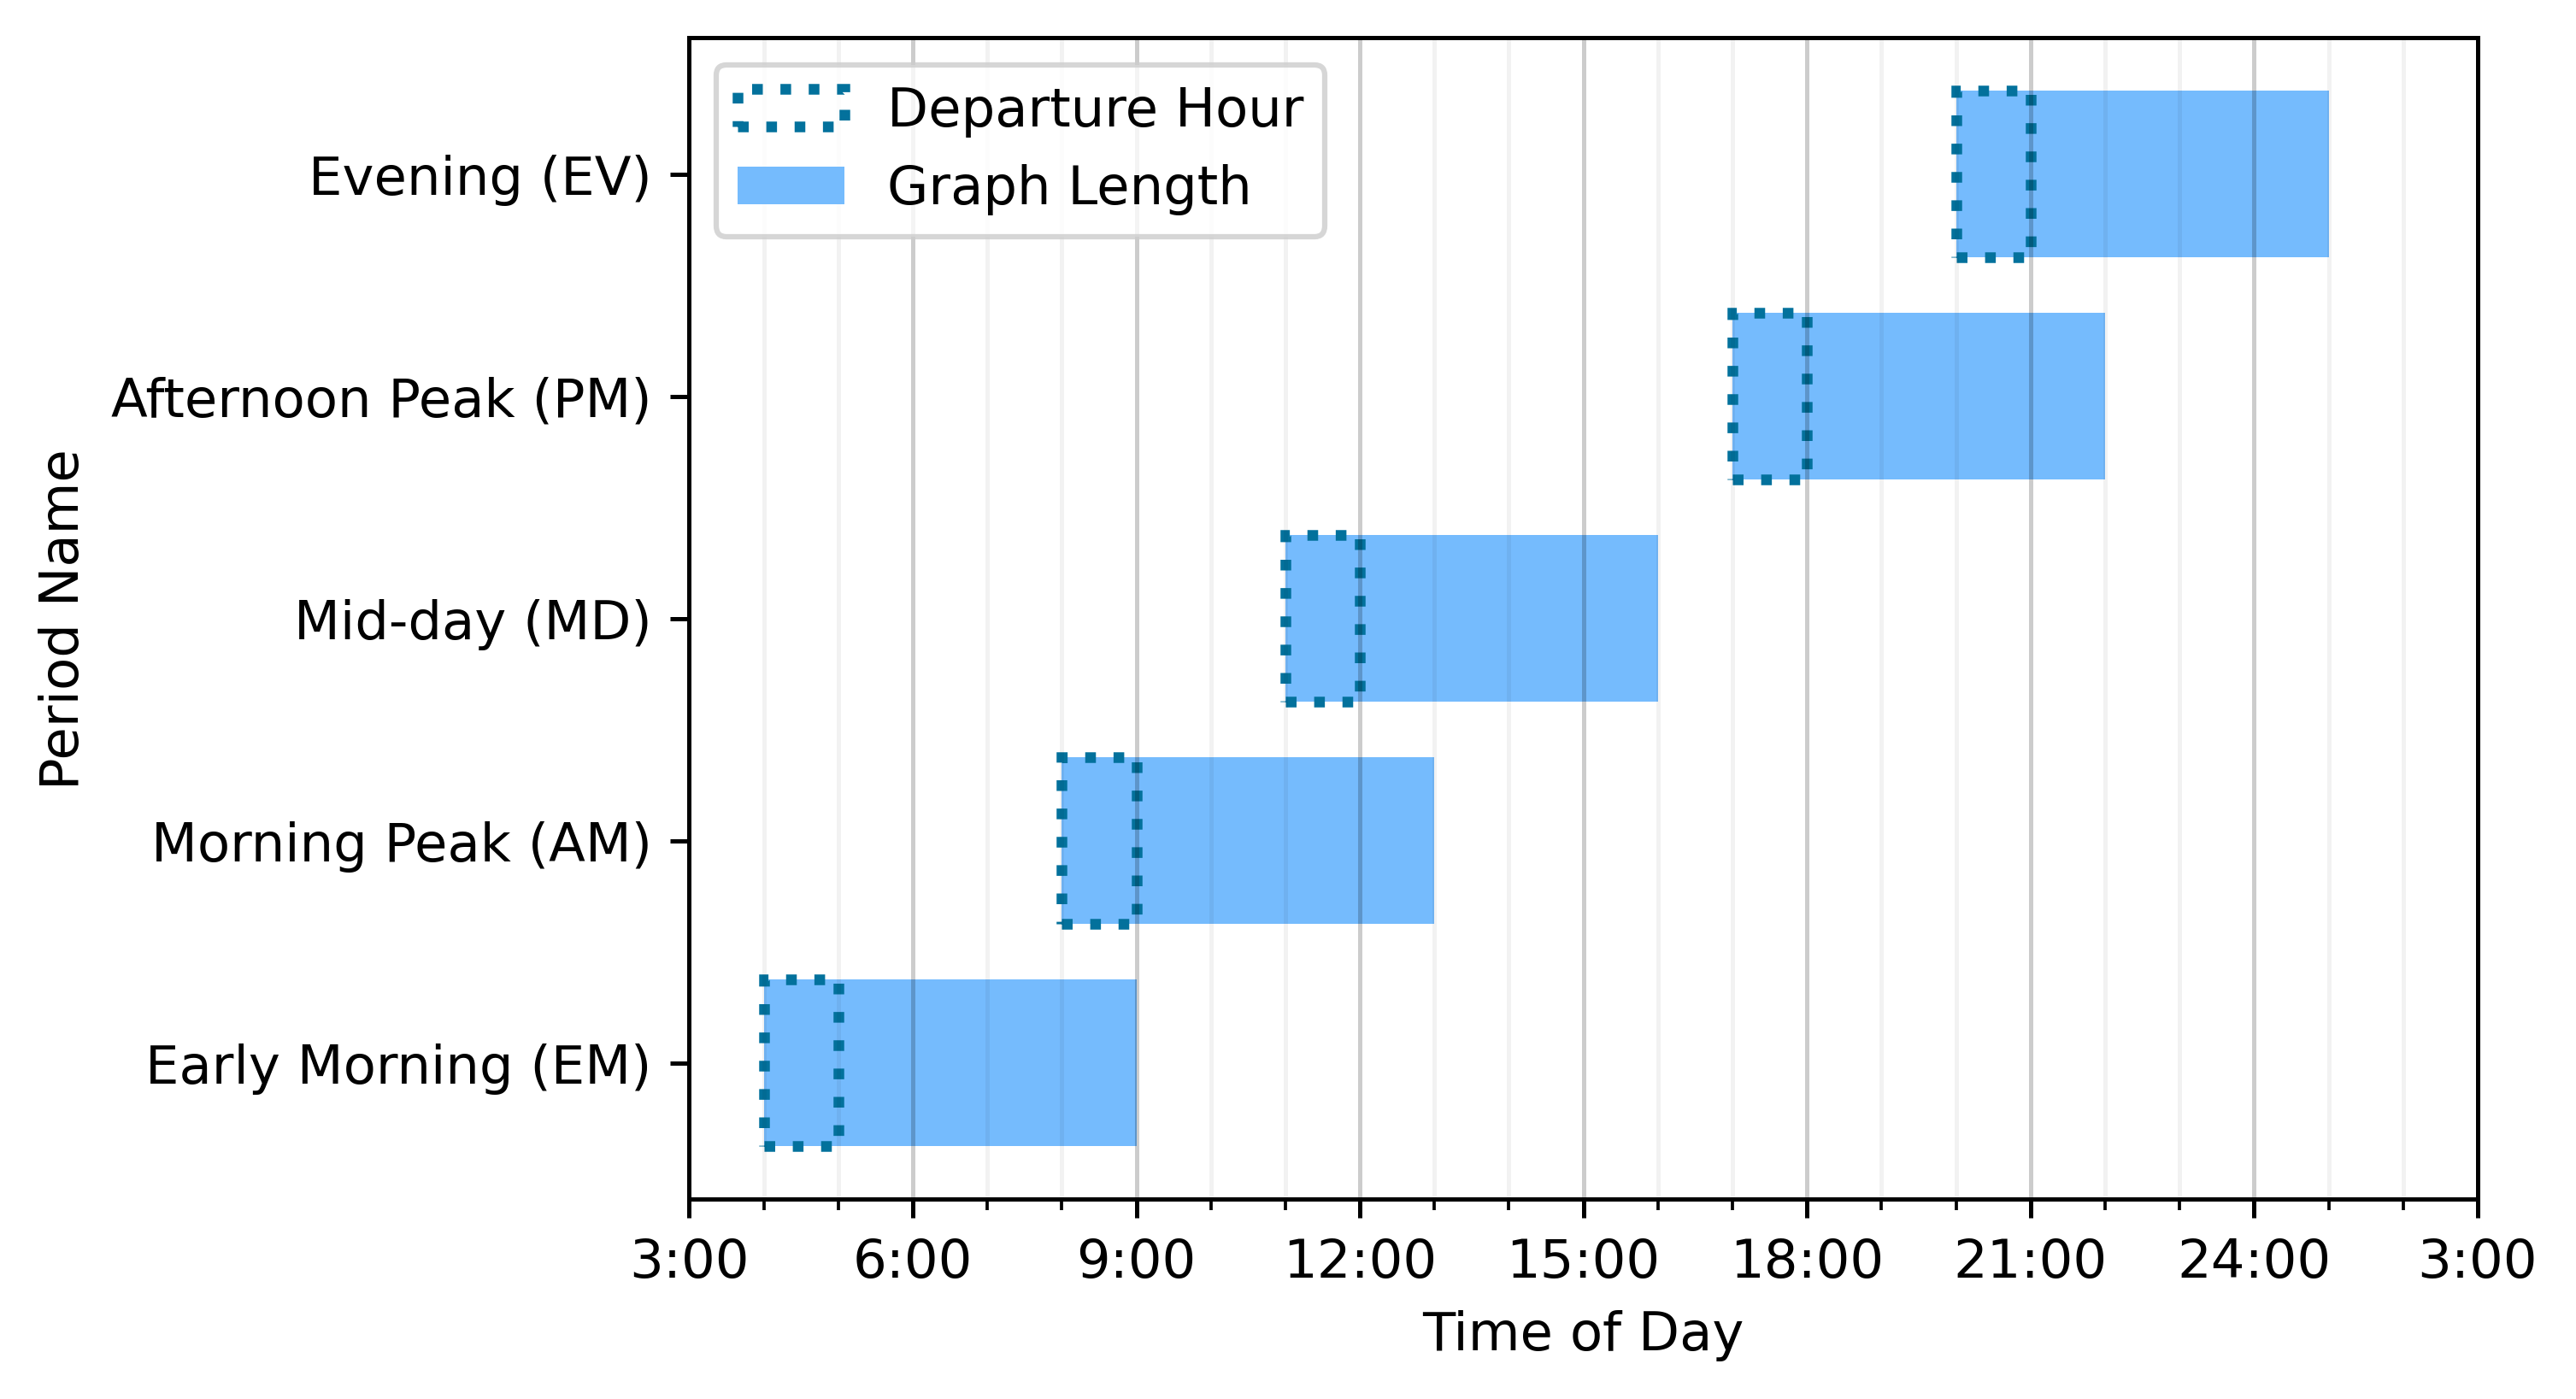

In [12]:
fig, ax = plt.subplots()


ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.grid(which = 'minor', axis = 'x', alpha = 0.05, color = 'k')
ax.grid(which = 'major', axis = 'x', alpha = 0.2, color = 'k')



ax.barh(y = range(5), width = 1, height = 0.75, left = start, edgecolor = 'xkcd:ocean blue', 
        linewidth = 2, label = 'Departure Hour',  fc=(0, 0, 0, 0), zorder =1, linestyle = 'dotted')
ax.barh(y = range(5), width = 5, height = 0.75, left = start, color = 'xkcd:sky blue', 
        label = 'Graph Length', zorder = 0)

ax.set_xticks([3,6,9,12,15,18,21,24, 27])
ax.set_xticklabels(['3:00','6:00', '9:00', '12:00', '15:00', '18:00', '21:00', '24:00', '3:00'])

ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(['Early Morning (EM)', 'Morning Peak (AM)', 'Mid-day (MD)',
                    'Afternoon Peak (PM)', 'Evening (EV)'])

ax.set_xlim([3, 27])

ax.legend()

ax.set_ylabel('Period Name')

ax.set_xlabel('Time of Day')

plt.show()